In [1]:
import numpy as np 
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

In [17]:
from tensorflow.keras.datasets import imdb
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/home/sambaran/anaconda3/envs/deep-learning/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/sambaran/anaconda3/envs/deep-learning/lib/python3.7/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or

In [18]:
def vectorize(sequence, num_words = 10000): 
    '''
    : this function takes the input sequence of the imdb dataset and vectorises it. 
    : Create a tensor of size len(train_data) * 10000.
    : Put a 1 if correspodning word is in review or 0 if it is not. 
    '''
    assert isinstance(num_words, int)
    output = np.zeros((len(sequence), num_words))
    for i,j in enumerate(sequence): 
        output[i,j] = 1
    return output

In [19]:
train_data = vectorize(train_data)
test_data = vectorize(test_data)

In [20]:
train_label

array([1, 0, 0, ..., 0, 1, 0])

In [21]:
def build_model(num_layers = 16, learning_rate = 1e-3): 
    '''
    : Function to create a neural network model
    : layers-> Number of neurons in the hidden layers
    : learning_rate -> Value of lr for the optimiser
    '''
    assert isinstance(learning_rate, float) and isinstance(num_layers, int)
    model = models.Sequential()
    model.add(layers.Dense(num_layers, activation = 'relu', input_shape = (10000,)))
    model.add(layers.Dense(num_layers, activation = 'relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    
    loss = binary_crossentropy
    optimiser = Adam(learning_rate= learning_rate)
    model.compile(loss=loss, optimizer=optimiser, metrics=['accuracy'])
    return model

In [22]:
val_size = int(0.3 * len(train_data))
x_val = train_data[:val_size]
y_val = train_label[:val_size]
x_train = train_data[val_size:]
y_train = train_label[val_size:]

model1 = build_model(num_layers = 16, learning_rate = 1e-2)
model2 = build_model(num_layers = 4, learning_rate= 1e-2)

history1 = model1.fit(x_train, y_train, batch_size = 512, epochs = 20, verbose = 0, validation_data = (x_val, y_val))
history2 = model2.fit(x_train, y_train, batch_size = 512, epochs = 20, verbose = 0, validation_data = (x_val, y_val))

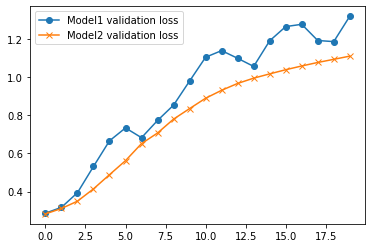

In [28]:
from matplotlib.pylab import subplots, figure
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(20), history1.history['val_loss'], label = 'Model1 validation loss', marker = 'o')
plt.plot(range(20), history2.history['val_loss'], label = 'Model2 validation loss', marker = 'x')
plt.legend()

It is clearly evident from the above that the larger network overfits a lot more than the smaller network. Hence the smaller network is better at generalisation than the larger network

# Regularisation 

In [31]:
from tensorflow.keras import regularizers
def build_regularised_model(num_layers = 16, learning_rate = 1e-2): 
    '''
    : Function to create a neural network model
    : layers-> Number of neurons in the hidden layers
    : learning_rate -> Value of lr for the optimiser
    : this will also add regularisation loss to the network. We will demonstrate only L2 regularisation here.
    '''
    assert isinstance(learning_rate, float) and isinstance(num_layers, int)
    model = models.Sequential()
    model.add(layers.Dense(num_layers, activation = 'relu', kernel_regularizer = regularizers.l2(0.001), input_shape = (10000,)))
    model.add(layers.Dense(num_layers, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(1,kernel_regularizer = regularizers.l2(0.001), activation='sigmoid'))
    
    loss = binary_crossentropy
    optimiser = Adam(learning_rate= learning_rate)
    model.compile(loss=loss, optimizer=optimiser, metrics=['accuracy'])
    return model

In [35]:
model1 = build_model(num_layers=16)
model2 = build_regularised_model(num_layers=16)

history1 = model1.fit(x_train, y_train, batch_size = 512, epochs = 15, validation_data=(x_val, y_val))
history2 = model2.fit(x_train, y_train, batch_size = 512, epochs = 15, validation_data=(x_val, y_val))

Epoch 1/15
35/35 [==============================] - 2s 33ms/step - loss: 0.6376 - accuracy: 0.6514 - val_loss: 0.3799 - val_accuracy: 0.8611
Epoch 2/15
35/35 [==============================] - 1s 24ms/step - loss: 0.3056 - accuracy: 0.8987 - val_loss: 0.2841 - val_accuracy: 0.8905
Epoch 3/15
35/35 [==============================] - 1s 28ms/step - loss: 0.1957 - accuracy: 0.9379 - val_loss: 0.2745 - val_accuracy: 0.8920
Epoch 4/15
35/35 [==============================] - 1s 26ms/step - loss: 0.1418 - accuracy: 0.9568 - val_loss: 0.2867 - val_accuracy: 0.8901
Epoch 5/15
35/35 [==============================] - 1s 33ms/step - loss: 0.1125 - accuracy: 0.9707 - val_loss: 0.3039 - val_accuracy: 0.8861
Epoch 6/15
35/35 [==============================] - 1s 24ms/step - loss: 0.0897 - accuracy: 0.9781 - val_loss: 0.3259 - val_accuracy: 0.8839
Epoch 7/15
35/35 [==============================] - 1s 23ms/step - loss: 0.0676 - accuracy: 0.9868 - val_loss: 0.3522 - val_accuracy: 0.8811
Epoch 8/15
35

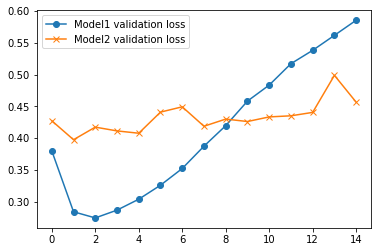

In [36]:
plt.plot(range(15), history1.history['val_loss'], label = 'Model1 validation loss', marker = 'o')
plt.plot(range(15), history2.history['val_loss'], label = 'Model2 validation loss', marker = 'x')
plt.legend()

We can see that the regularised model performs better than the original model. With regularisation we have to be careful that we dont add large penalties for a smaller network. Hence the regularisation weight is also a hyperparameter to experiment with. 

# Dropout

In [37]:
def build_dropout_model(num_layers = 16, learning_rate = 1e-3): 
    '''
    : Function to create a neural network model
    : layers-> Number of neurons in the hidden layers
    : learning_rate -> Value of lr for the optimiser
    : this also implements dropout within the network for regularisation.
    : dropout fractions is kept as p = 0.5
    '''
    assert isinstance(learning_rate, float) and isinstance(num_layers, int)
    p = 0.5
    model = models.Sequential()
    model.add(layers.Dense(num_layers, activation = 'relu', input_shape = (10000,)))
    model.add(layers.Dropout(p))
    model.add(layers.Dense(num_layers, activation = 'relu'))
    model.add(layers.Dropout(p))
    model.add(layers.Dense(1,activation='sigmoid'))
    
    loss = binary_crossentropy
    optimiser = Adam(learning_rate= learning_rate)
    model.compile(loss=loss, optimizer=optimiser, metrics=['accuracy'])
    return model

In [38]:
model1 = build_model(num_layers=16)
model2 = build_dropout_model(num_layers=16)

history1 = model1.fit(x_train, y_train, batch_size = 512, epochs = 15, validation_data=(x_val, y_val), verbose = False)
history2 = model2.fit(x_train, y_train, batch_size = 512, epochs = 15, validation_data=(x_val, y_val), verbose = False)

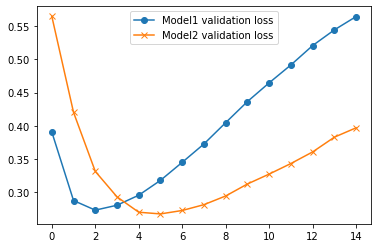

In [39]:
plt.plot(range(15), history1.history['val_loss'], label = 'Model1 validation loss', marker = 'o')
plt.plot(range(15), history2.history['val_loss'], label = 'Model2 validation loss', marker = 'x')
plt.legend()

We can see that the dropout model performed really well compared to the original model as well as the L2 regularised model. Nowadays dropout is a very common method of regularisation.